# Import libraries

In [3]:
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pacmap
import umap

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Plotting Function

In [6]:
def plot_k_means(dimensions = 10, clusters = 4):
    
    data = "../Data/Variance/most_variable_" + str(dimensions) + ".csv"
    variance_genes = pd.read_csv(data, index_col="Unnamed: 0").T
    
    # Getting KMeans
    kmeans = KMeans(n_clusters=clusters, random_state=0).fit(variance_genes)
    
    # Visualization 2-D
    embedding_2 = pacmap.PaCMAP(n_neighbors=40, random_state=42) 
    pacmap_2_axes = embedding_2.fit_transform(variance_genes.values)
    plt.scatter(pacmap_2_axes[:,0], pacmap_2_axes[:,1], c=kmeans.labels_)
    plt.savefig("../Figures/Assg_3/top_" + str(dimensions) + "_clusternum_" + str(clusters) + "_2_dim", bbox_inches="tight")
    plt.show()
    
    # Visualization 3-D
    embedding_3 = pacmap.PaCMAP(n_components=3, n_neighbors=40) 
    pacmap_3_axes = embedding_3.fit_transform(variance_genes.values, init="pca")
    ax = plt.axes(projection ="3d")
    ax.scatter3D(pacmap_3_axes[:,0], pacmap_3_axes[:,1], pacmap_3_axes[:,2], c = kmeans.labels_)
    plt.savefig("../Figures/Assg_3/top_" + str(dimensions) + "_clusternum_" + str(clusters) + "_3_dim", bbox_inches="tight")
    plt.show()

/usr/local/lib/python3.10/site-packages/pacmap/pacmap.py:774: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


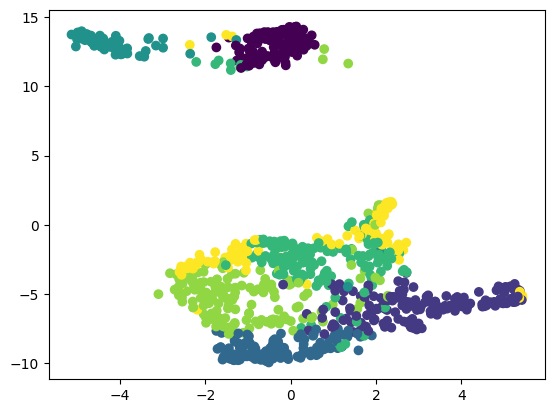

/usr/local/lib/python3.10/site-packages/pacmap/pacmap.py:778: UserWarning: Warning: random state is removed
  warnings.warn(f'Warning: random state is removed')


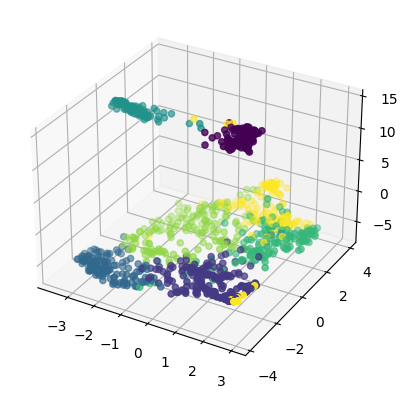

In [7]:
plot_k_means(dimensions=10000, clusters=7)

# Sample Heatmap

/usr/local/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


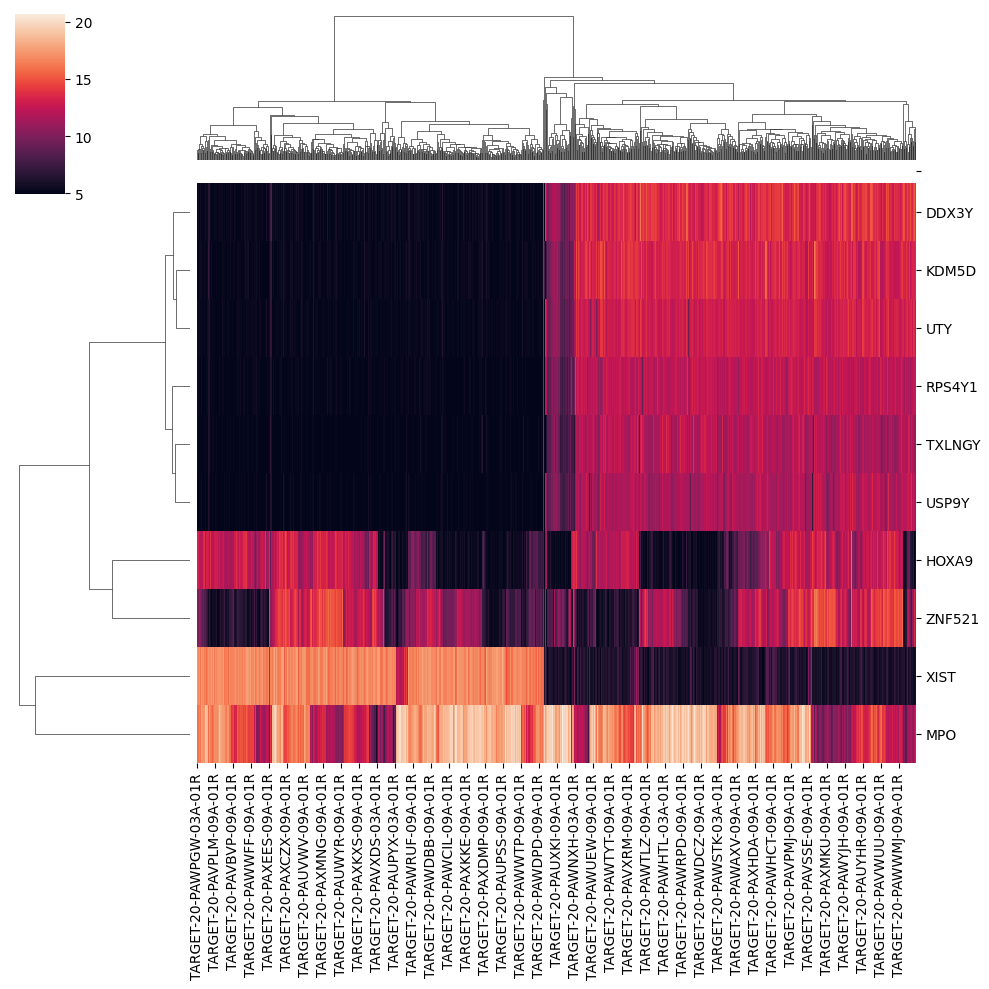

In [95]:
variance_genes = pd.read_csv("../Data/Variance/most_variable_10.csv", index_col="Unnamed: 0").T
kmeans = KMeans(n_clusters=3, random_state=0).fit(variance_genes)
series = pd.Series(kmeans.labels_)
lut = dict(zip(series.unique(), "bgy"))
row_colors = series.map(lut)
sns.clustermap(variance_genes.T, col_colors=row_colors)

# Sample Sankey

In [ ]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 10,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [2, 3, 3, 4, 4, 5],
      value = [8, 4, 2, 8, 4, 2]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()